## Demo Nested Topic Modeling Maps using bunkatech

 Nested Topic Modeling is a way to explore data using embeddings and nestedness. The class uses the BasicSemantics class at his core and add a new layer on top of it. go to **demo_basics.ipynb** to understand the core functions of bunkatech.

In [1]:
import pandas as pd
from bunkatech.topic_modeling import NestedTopicModeling
from sklearn.datasets import fetch_20newsgroups
import warnings
warnings.filterwarnings('ignore')
 
# Load Data
docs = fetch_20newsgroups(subset='all',  remove=('headers', 'footers', 'quotes'))['data']
data = pd.DataFrame(docs, columns = ['docs'])
data = data.sample(2000, random_state = 42).reset_index(drop=True)
data['doc_index'] = data.index

#### Extract the basic elements

In [5]:
# All the basic components to compute before more specialized computation
nested = NestedTopicModeling(data = data,
                        text_var = 'docs',
                        index_var = 'doc_index',
                        extract_terms=True,
                        terms_embedding=True,
                        docs_embedding=True,
                        sample_size_terms=2000,
                        terms_limit=2000,
                        terms_ents=False,
                        terms_ngrams=(2, 2),
                        terms_ncs=False,
                        terms_include_pos=["NOUN", "PROPN", "ADJ"],
                        terms_include_types=["PERSON", "ORG"],
                        terms_embedding_model="all-MiniLM-L6-v2",
                        docs_embedding_model="all-MiniLM-L6-v2",
                        language="en",
                        terms_path=None,
                        terms_embeddings_path=None,
                        docs_embeddings_path=None,
                        docs_multiprocessing = True,
                        terms_multiprocessing = True)

  0%|                                                                 | 0/1959 [00:00<?, ?it/s]2022-03-30 15:06:34,737 - INFO : loaded 'en_core_web_sm' spaCy language pipeline
2022-03-30 15:06:34,778 - INFO : loaded 'en_core_web_sm' spaCy language pipeline
2022-03-30 15:06:34,792 - INFO : loaded 'en_core_web_sm' spaCy language pipeline
2022-03-30 15:06:34,804 - INFO : loaded 'en_core_web_sm' spaCy language pipeline
2022-03-30 15:06:34,817 - INFO : loaded 'en_core_web_sm' spaCy language pipeline
2022-03-30 15:06:34,841 - INFO : loaded 'en_core_web_sm' spaCy language pipeline
2022-03-30 15:06:34,862 - INFO : loaded 'en_core_web_sm' spaCy language pipeline
2022-03-30 15:06:34,907 - INFO : loaded 'en_core_web_sm' spaCy language pipeline
100%|█████████████████████████████████████████████████████| 1959/1959 [00:17<00:00, 110.71it/s]
2022-03-30 15:06:47,123 - INFO : Load pretrained SentenceTransformer: all-MiniLM-L6-v2
2022-03-30 15:06:53,234 - INFO : Use pytorch device: cpu


Batches:   0%|          | 0/63 [00:00<?, ?it/s]

2022-03-30 15:07:02,699 - INFO : Load pretrained SentenceTransformer: all-MiniLM-L6-v2


Start Embedding...


2022-03-30 15:07:08,759 - INFO : Use pytorch device: cpu
2022-03-30 15:07:08,760 - INFO : CUDA is not available. Start 4 CPU worker
2022-03-30 15:07:08,760 - INFO : Start multi-process pool on devices: cpu, cpu, cpu, cpu


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

2022-03-30 15:07:14,361 - INFO : Chunk data into packages of size 50


UMAP(n_components=5, verbose=True)
Wed Mar 30 15:08:20 2022 Construct fuzzy simplicial set
Wed Mar 30 15:08:22 2022 Finding Nearest Neighbors
Wed Mar 30 15:08:23 2022 Finished Nearest Neighbor Search
Wed Mar 30 15:08:24 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Wed Mar 30 15:08:27 2022 Finished embedding


#### Create the Nested maps

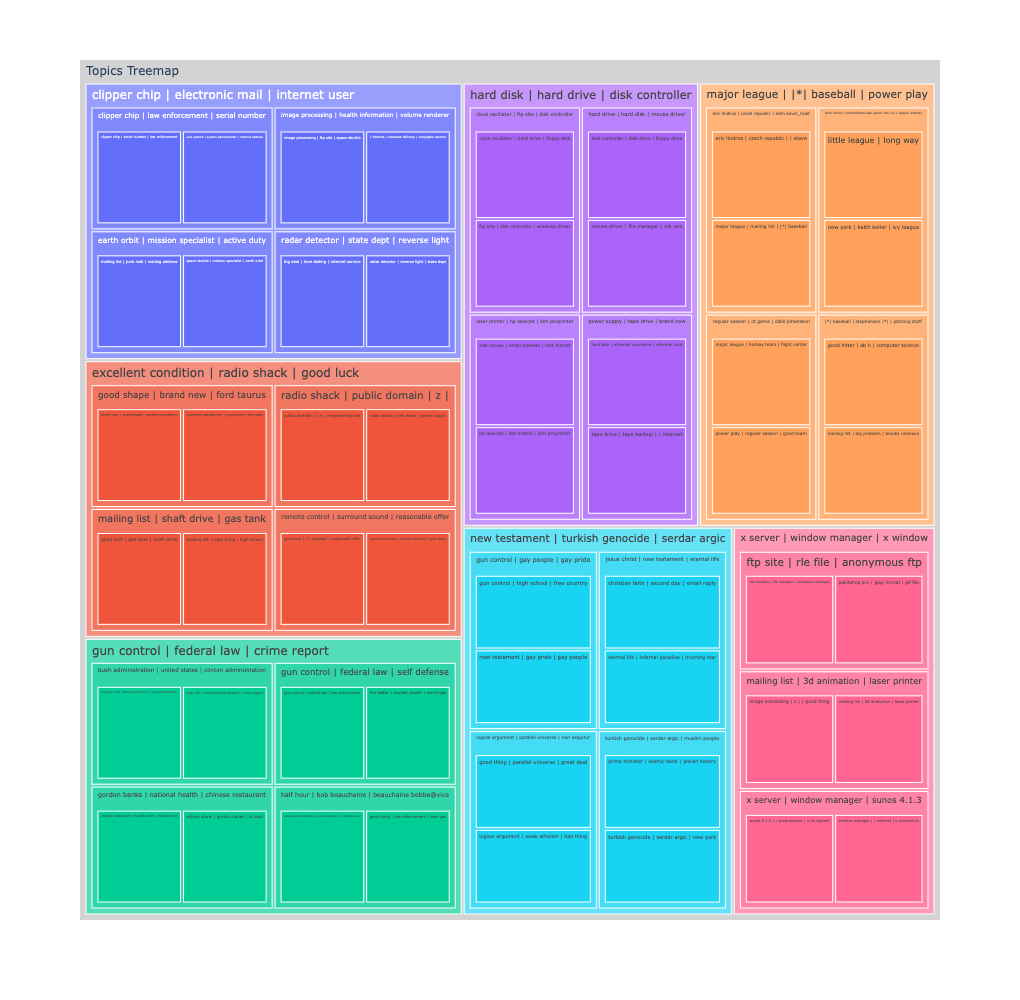

In [7]:
fig = nested.nested_maps(
        size_rule="equal_size",
        map_type="treemap", # Try sunburst
        width=1000,
        height=1000,
        query=None) # You can query the map with an exact query

fig.show()

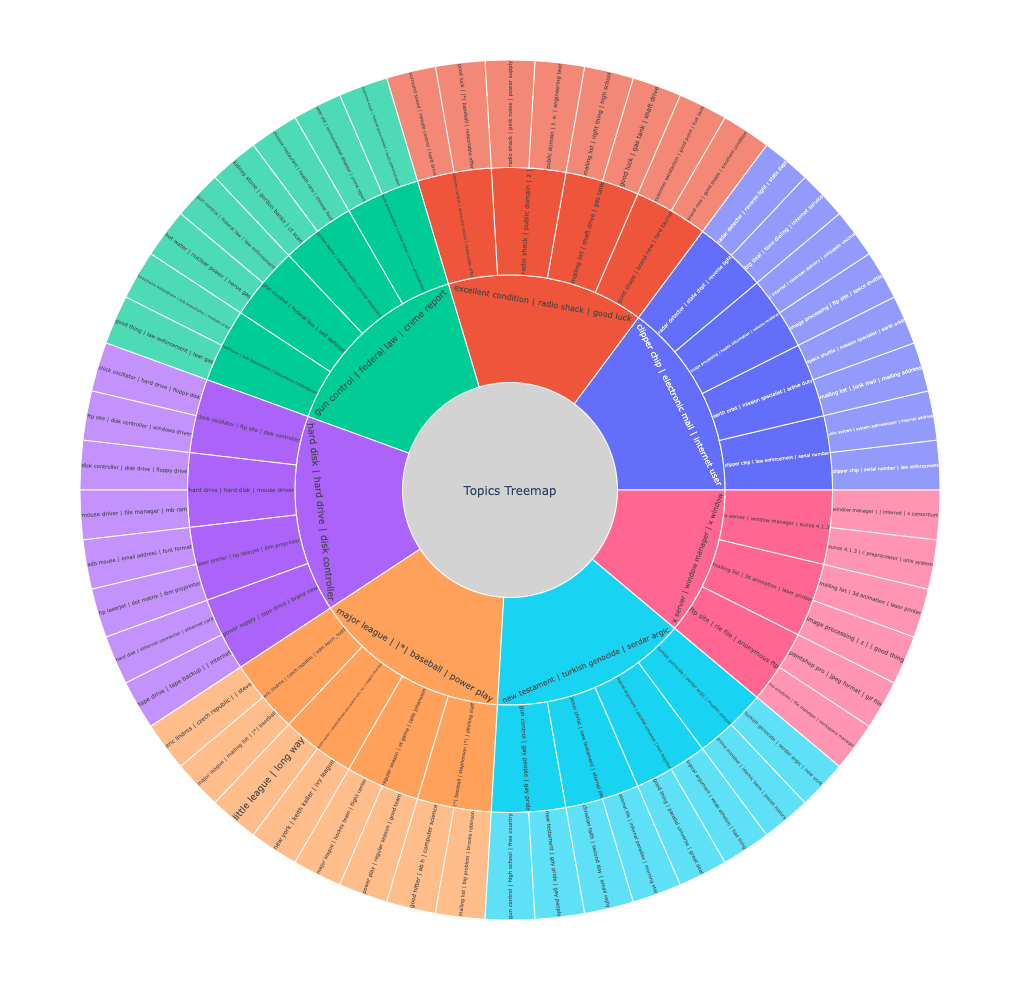

In [10]:
fig = nested.nested_maps(
        size_rule="equal_size",
        map_type="sunburst", # Try sunburst
        width=1000,
        height=1000,
        query=None) # You can query the map with an exact query

fig.show()

#### For every level, visual the emebddings on a 2D Maps

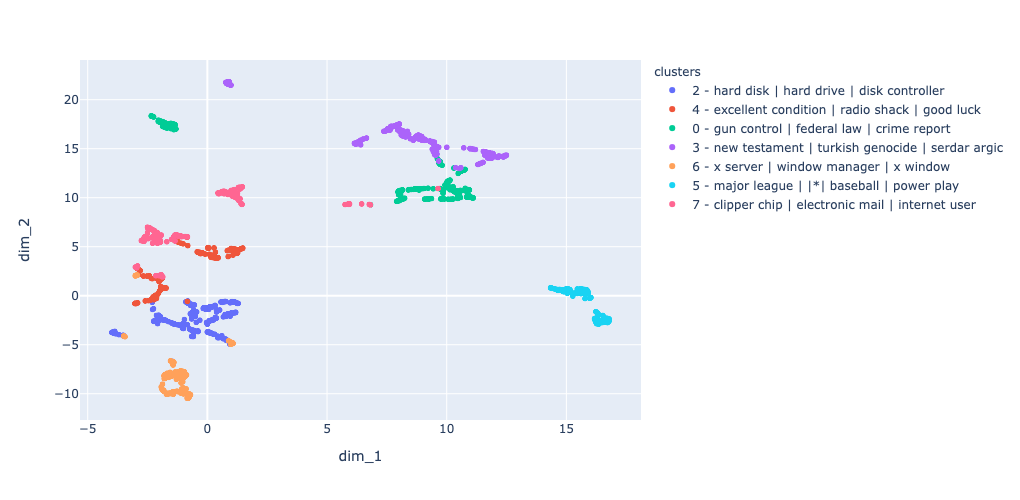

In [17]:
nested.visualize_2D_embeddings(nested_level=0,  width = 1000, height = 500)

#### Visualize the centroid documents of every cluster for every level of nestedness

In [20]:
centroid_documents = nested.get_centroid_documents_nested(nested_level = 0, top_elements = 2)
centroid_documents

clusters                                      centroid_docs  \
0         0  \nAtomic Energy Commision - Hmm, they would sa...   
1         2  Is there anyone out there with a copy of the d...   
2         3  \n\nYou misrepresent me, Selim.  The hard evid...   
3         4  I'm posting this for a friend, but you can e-m...   
4         5  \nBryan Murray has done very little as GM...Yz...   
5         6  There has been a long running discussion over ...   
6         7  \nTwo things:\n\n\t1. Read your own posts. I w...   

                                          farest_doc  cluster_radius  
0  I live at sea-level, and am called-upon to tra...        2.912559  
1  The following cassette tapes are for sale.  $3...        1.827160  
2  \n\n\n\nAre you related to 'Arromdian' of ASAL...        1.915991  
3  **********************************************...        3.121007  
4  \nIt would seem logical that the mask is Potvi...        2.546046  
5  There is another useful method based on Least ...        2.675378  
6  Sorry, the San Jose based Rosicrucian order is...        2.529353